In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 2.96MB/s]


In [4]:
!unzip \*.zip  && rm *.zip

Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [5]:
import pandas as pd
import numpy as np

In [6]:
iris = pd.read_csv('Iris.csv')

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.rename(columns={'SepalLengthCm' : 'Sepal Length', 'SepalWidthCm' : 'Sepal Width', 'PetalLengthCm' : 'Petal Length', 'PetalWidthCm' : 'Petal Width',
                     'Species' : 'Species'}, inplace=True)
iris.Species.replace({'Iris-setosa' : 'Setosa', 'Iris-versicolor' : 'Versicolor', 'Iris-virginica' : 'Virginica'}, inplace=True)
iris.drop('Id', axis=1, inplace=True)

In [9]:
iris.Species.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

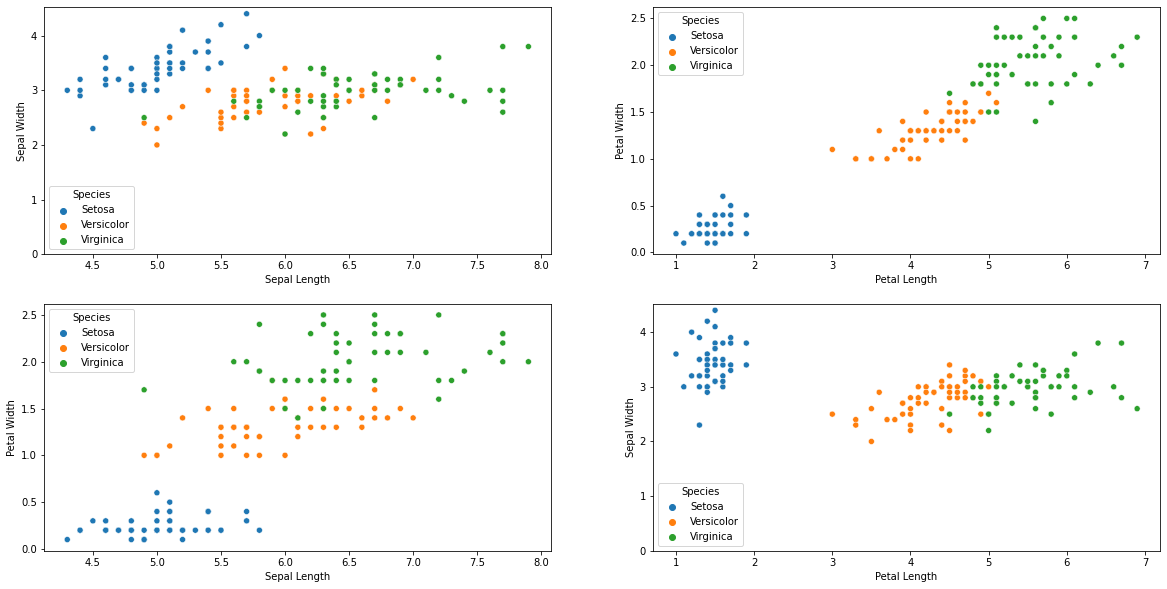

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2, figsize=(20,10))
sns.scatterplot(x='Sepal Length', y='Sepal Width', data=iris, hue='Species', ax=ax[0,0])
sns.scatterplot(x='Petal Length', y='Petal Width', data=iris, hue='Species', ax=ax[0,1])
sns.scatterplot(x='Sepal Length', y='Petal Width', data=iris, hue='Species', ax=ax[1,0])
sns.scatterplot(x='Petal Length', y='Sepal Width', data=iris, hue='Species', ax=ax[1,1])
ax[0,0].set_ylim(0)
ax[1,1].set_ylim(0)
plt.show()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
num_data = pd.DataFrame(iris)
num_data['Species'] = le.fit_transform(iris['Species'])
num_data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
cols = [col for col in num_data.columns if col not in ['Species']]
data = num_data[cols]
target = num_data['Species']
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
target.unique()

array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
pred = gnb.fit(data_train, target_train).predict(data_test)
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  1.0


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0, dual=False)
#train the algorithm on training data and predict using the testing data
pred2 = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred2, normalize = True))

LinearSVC accuracy :  0.9666666666666667


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gscv.fit(data_test, target_test)
print(knn_gscv.best_params_)

from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(KNeighborsClassifier(), param_grid, random_state=0)
search = clf.fit(data_test, target_test)
print(search.best_params_)

{'n_neighbors': 2}
{'n_neighbors': 2}


In [ ]:
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(data_train, target_train)
pred3 = neigh.predict(data_test)
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred3))

KNeighbors accuracy score :  0.9666666666666667
